<a href="https://colab.research.google.com/github/maulanawirawan/Final-Project-Data-Analytics-Coding-Studio/blob/main/Final_Project_Kelompok_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background

Kelompok 7 menggunakan dataset Coffee Shop Sales dalam sebagai data yang digunakan dalam pengerjaan final project. Dataset berisi catatan transaksi untuk Maven Roasters, kedai kopi fiktif yang beroperasi di tiga lokasi NYC. Dataset mencakup tanggal transaksi, stempel waktu, dan lokasi, bersama dengan detail tingkat produk.penjelasan beberapa kolom dalam dataset sebagai berikut

* transaction_id : Unique sequential ID representing an individual transaction
* transaction_date : Date of the transaction (MM/DD/YY)
* transaction_time : Timestamp of the transaction (HH:MM:SS)
* transaction_qty : Quantity of items sold
* store_id : Unique ID of the coffee shop where the transaction took place
* store_location : Location of the coffee shop where the transaction took place
* product_id : Unique ID of the product sold
* unit_price : Retail price of the product sold
* product_category : Description of the product category
* product_type : Description of the product type
* product_detail : Description of the product detail

# Data Preprocessing

## Data Load

In [ ]:
# Menghubungkan dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Mengimpor library
import pandas as pd

In [ ]:
# Melakukan load dataset
df = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/Data/Coffee Shop Sales.xlsx')
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


## Data Understanding

In [ ]:
# Melihat informasi terkait dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


Pada dataset Coffee Shop Sales dapat diketahui bahwa dataset ini memiliki 11 column dengan jumlah baris sebanyak 149116 dengan tipe data sebagai berikut

1. **transaction_id** memiliki tipe data **integer**
2. **transaction_date** memiliki tipe data **datetime**
3. **transaction_time** memiliki tipe data **object**
4. **transaction_qty** memiliki tipe data **integer**
5. **store_id** memiliki tipe data **integer**
6. **store_location** memiliki tipe data **object**
7. **product_id** memiliki tipe data **integer**
8. **unit_price** memiliki tipe data **float**
9. **product_category** memiliki tipe data **object**
10. **product_type** memiliki tipe data **object**
11. **product_detail** memiliki tipe data **object**

In [ ]:
# Melihat jumlah baris dan kolom pada dataset
df.shape

(149116, 11)

Dataset **Coffee Shop Sales** memiliki 149116 baris data dan 11 kolom

In [ ]:
# Melihat deskripsi statistik pada dataset
df.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.542509,2.074241,17.930020,2.658723
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,45.000000


Sintaks **describe()** secara default akan menampilkan kolom-kolom yang bernilai numerik untuk menampilkan deskripsi statistik dari suatu dataset. Dapat dilihat kolom yang tampil adalah

1.   transaction_id
2.   transaction_qty
3.   store_id
4.   product_id
5.   unit_price

Dengan deskripsi statistik yang ditampilkan adalah

*   **count** : Jumlah data pada kolom
*   **mean** : Nilai rata-rata pada kolom
*   **std** : Standar deviasi
*   **min** : Nilai minimun
*   **25%, 50%, 75%** : Batas nilai dari masing-masing kuartil
*   **max** : Nilai Maksimun





In [ ]:
# Mencari value pada kolom transaction_id
df.transaction_id.unique()

array([     1,      2,      3, ..., 149454, 149455, 149456])

In [ ]:
# Mencari value pada kolom transaction_date
df.transaction_date.unique()

array(['2023-01-01T00:00:00.000000000', '2023-01-02T00:00:00.000000000',
       '2023-01-03T00:00:00.000000000', '2023-01-04T00:00:00.000000000',
       '2023-01-05T00:00:00.000000000', '2023-01-06T00:00:00.000000000',
       '2023-01-07T00:00:00.000000000', '2023-01-08T00:00:00.000000000',
       '2023-01-09T00:00:00.000000000', '2023-01-10T00:00:00.000000000',
       '2023-01-11T00:00:00.000000000', '2023-01-12T00:00:00.000000000',
       '2023-01-13T00:00:00.000000000', '2023-01-14T00:00:00.000000000',
       '2023-01-15T00:00:00.000000000', '2023-01-16T00:00:00.000000000',
       '2023-01-17T00:00:00.000000000', '2023-01-18T00:00:00.000000000',
       '2023-01-19T00:00:00.000000000', '2023-01-20T00:00:00.000000000',
       '2023-01-21T00:00:00.000000000', '2023-01-22T00:00:00.000000000',
       '2023-01-23T00:00:00.000000000', '2023-01-24T00:00:00.000000000',
       '2023-01-25T00:00:00.000000000', '2023-01-26T00:00:00.000000000',
       '2023-01-27T00:00:00.000000000', '2023-01-28

In [ ]:
# Mencari value pada kolom transaction_time
df.transaction_time.unique()

array([datetime.time(7, 6, 11), datetime.time(7, 8, 56),
       datetime.time(7, 14, 4), ..., datetime.time(10, 34, 30),
       datetime.time(12, 3, 24), datetime.time(16, 59, 49)], dtype=object)

In [ ]:
# Mencari value pada kolom transaction_qty
df.transaction_qty.unique()

array([2, 1, 3, 4, 8, 6])

In [ ]:
# Mencari value pada kolom store_id
df.store_id.unique()

array([5, 8, 3])

In [ ]:
# Mencari value pada kolom store_location
df.store_location.unique()

array(['Lower Manhattan', "Hell's Kitchen", 'Astoria'], dtype=object)

In [ ]:
# Mencari value pada kolom product_id
df.product_id.unique()

array([32, 57, 59, 22, 77, 28, 39, 58, 56, 33, 51, 87, 47, 79, 42, 61, 69,
       40, 43, 76, 45, 71, 38, 26, 27, 29, 54, 55, 24, 60, 78, 44, 48, 23,
       46, 25, 34, 36, 74, 53, 41, 37, 50, 72, 35, 70, 73, 75, 31, 49, 52,
       30, 64, 12, 63,  6,  9, 65, 84, 19,  7,  1, 17, 10,  4, 15, 16,  3,
       20, 83, 18, 21, 13, 11,  5,  2, 81, 14,  8, 82])

In [ ]:
# Mencari value pada kolom unit_price
df.unit_price.unique()

array([ 3.  ,  3.1 ,  4.5 ,  2.  ,  4.25,  3.5 ,  2.55,  3.75,  2.5 ,
        4.75,  3.25,  4.  ,  2.2 ,  2.45,  0.8 ,  8.95, 21.  , 28.  ,
        6.4 , 19.75, 12.  , 18.  ,  9.5 , 10.  , 20.45,  9.25, 22.5 ,
       14.75,  7.6 , 14.  , 10.95, 13.33, 15.  ,  4.38,  4.06,  5.63,
        4.69, 45.  , 23.  ,  2.1 ,  2.65])

In [ ]:
# Mencari value pada kolom product_category
df.product_category.unique()

array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Flavours',
       'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
      dtype=object)

In [ ]:
# Mencari value pada kolom product_type
df.product_type.unique()

array(['Gourmet brewed coffee', 'Brewed Chai tea', 'Hot chocolate',
       'Drip coffee', 'Scone', 'Barista Espresso', 'Brewed Black tea',
       'Brewed Green tea', 'Brewed herbal tea', 'Biscotti', 'Pastry',
       'Organic brewed coffee', 'Premium brewed coffee', 'Regular syrup',
       'Herbal tea', 'Gourmet Beans', 'Organic Beans', 'Sugar free syrup',
       'Drinking Chocolate', 'Premium Beans', 'Chai tea', 'Green beans',
       'Espresso Beans', 'Green tea', 'Organic Chocolate', 'Housewares',
       'Black tea', 'House blend Beans', 'Clothing'], dtype=object)

In [ ]:
# Mencari value pada kolom product_detail
df.product_detail.unique()

array(['Ethiopia Rg', 'Spicy Eye Opener Chai Lg', 'Dark chocolate Lg',
       'Our Old Time Diner Blend Sm', 'Oatmeal Scone',
       'Columbian Medium Roast Sm', 'Latte Rg', 'Dark chocolate Rg',
       'Spicy Eye Opener Chai Rg', 'Ethiopia Lg', 'Earl Grey Lg',
       'Ouro Brasileiro shot', 'Serenity Green Tea Lg',
       'Jumbo Savory Scone', 'Lemon Grass Rg',
       'Sustainably Grown Organic Lg', 'Hazelnut Biscotti', 'Cappuccino',
       'Lemon Grass Lg', 'Chocolate Chip Biscotti', 'Peppermint Lg',
       'Chocolate Croissant', 'Latte', 'Brazilian Rg', 'Brazilian Lg',
       'Columbian Medium Roast Rg', 'Morning Sunrise Chai Rg',
       'Morning Sunrise Chai Lg', 'Our Old Time Diner Blend Lg',
       'Sustainably Grown Organic Rg', 'Scottish Cream Scone ',
       'Peppermint Rg', 'English Breakfast Rg',
       'Our Old Time Diner Blend Rg', 'Serenity Green Tea Rg',
       'Brazilian Sm', 'Jamaican Coffee River Sm',
       'Jamaican Coffee River Lg', 'Ginger Biscotti',
       'Tradit

## Check Missing Value

In [ ]:
# Mengecek missing value
df.isna()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
149111,False,False,False,False,False,False,False,False,False,False,False
149112,False,False,False,False,False,False,False,False,False,False,False
149113,False,False,False,False,False,False,False,False,False,False,False
149114,False,False,False,False,False,False,False,False,False,False,False


Nilai pada dataset yang menunjukkan **True** menandakan adanya missing value

In [ ]:
# Mengecek missing value
df.isnull()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
149111,False,False,False,False,False,False,False,False,False,False,False
149112,False,False,False,False,False,False,False,False,False,False,False
149113,False,False,False,False,False,False,False,False,False,False,False
149114,False,False,False,False,False,False,False,False,False,False,False


Nilai pada dataset yang menunjukkan **True** menandakan adanya missing value

In [ ]:
# Mengecek missing value dengan agregasi data
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

Tidak terdapat nilai kosong atau *missing value* pada setiap kolom dan baris pada dataset

## Checking Duplicate

In [ ]:
# Mengecek data duplikat
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
149111    False
149112    False
149113    False
149114    False
149115    False
Length: 149116, dtype: bool

Nilai pada dataset yang menunjukkan **True** menandakan adanya missing value

In [ ]:
# Mengecek missing value dengan agregasi data
df.duplicated().sum()

0

Tidak terdapat data duplikat atau *duplicated data* pada setiap kolom dan baris pada dataset

#SQL Analysis

In [ ]:
from IPython.display import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.Bagaimana tren penjualan Maven Roasters dari waktu ke waktu?

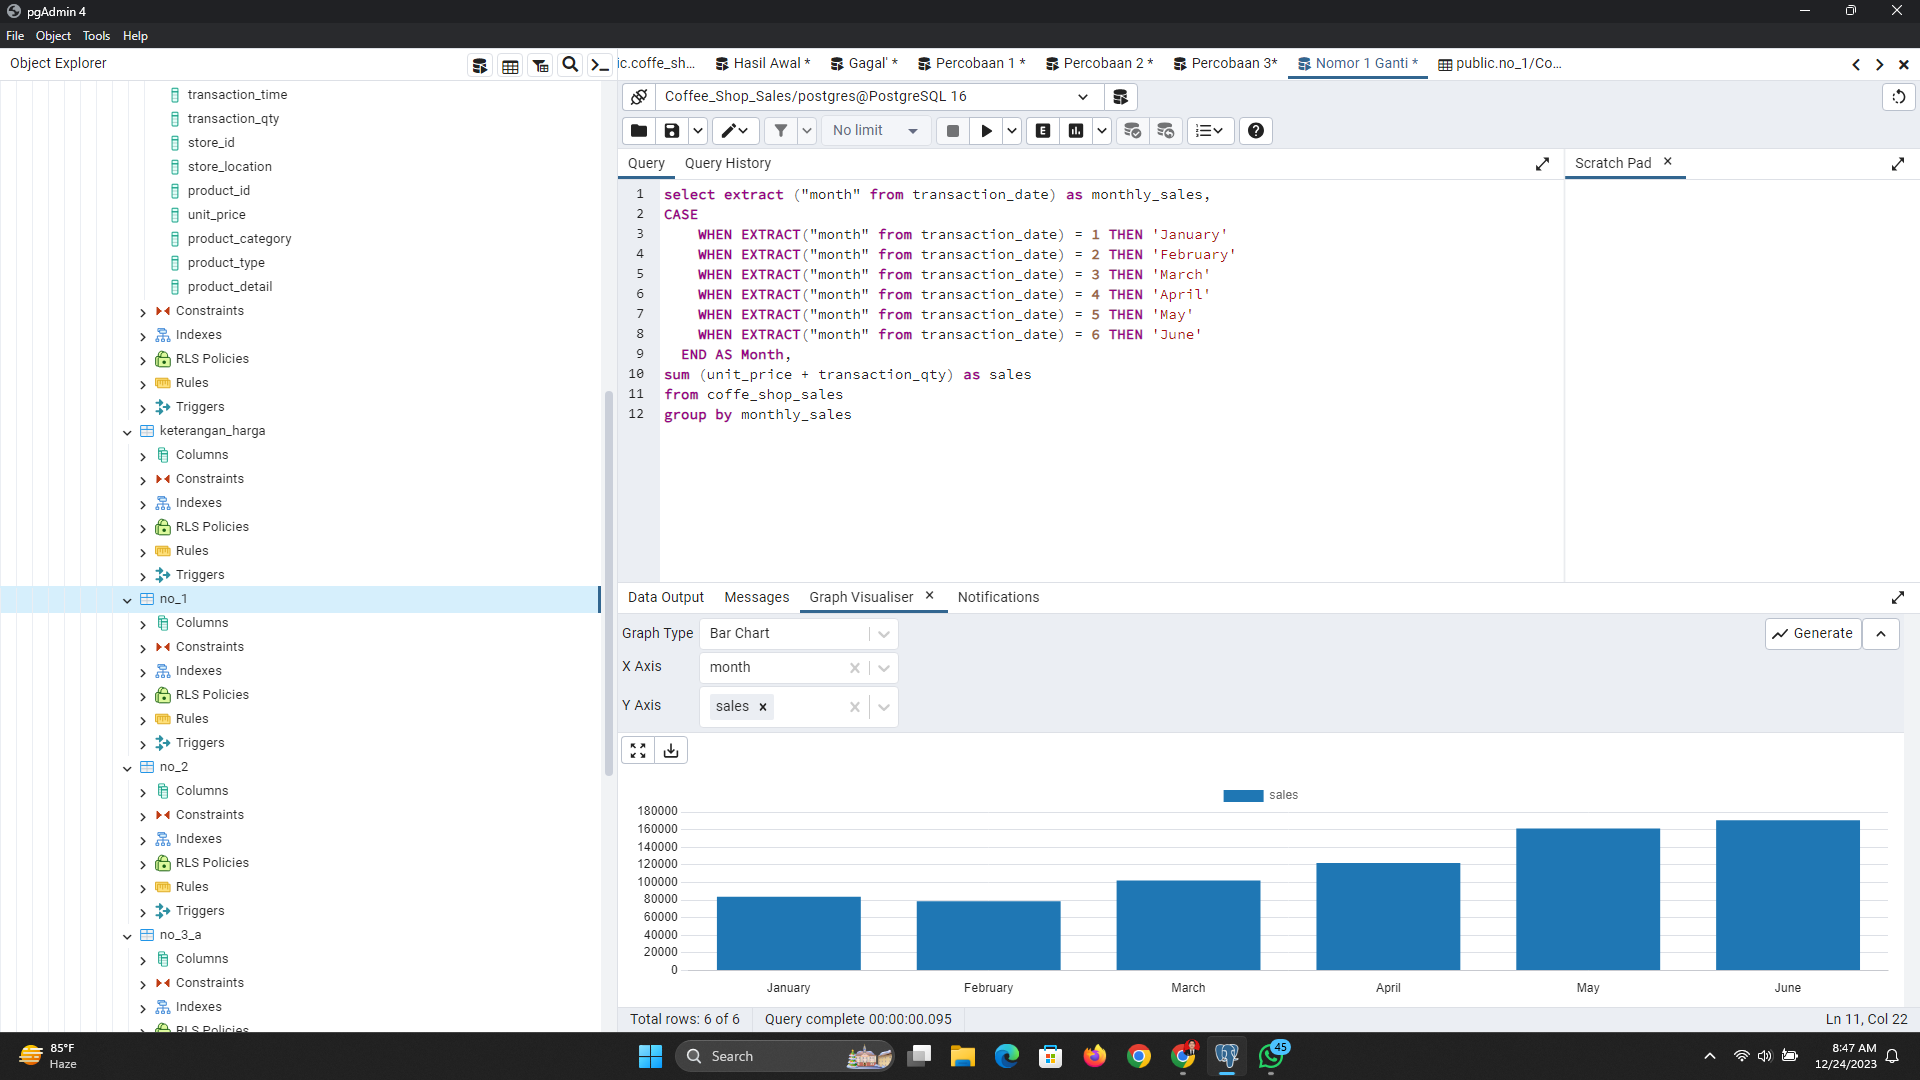

In [ ]:
Image('/content/drive/MyDrive/Screenshot (2645).png', width=1200, height=600)

***Dalam 6 bulan terakhir penjualan selalu mengalami peningkatan, namun terdapat penurunan pada bulan ke 2***

## 2.Hari mana dalam seminggu yang cenderung paling sibuk, dan menurut Anda mengapa demikian?

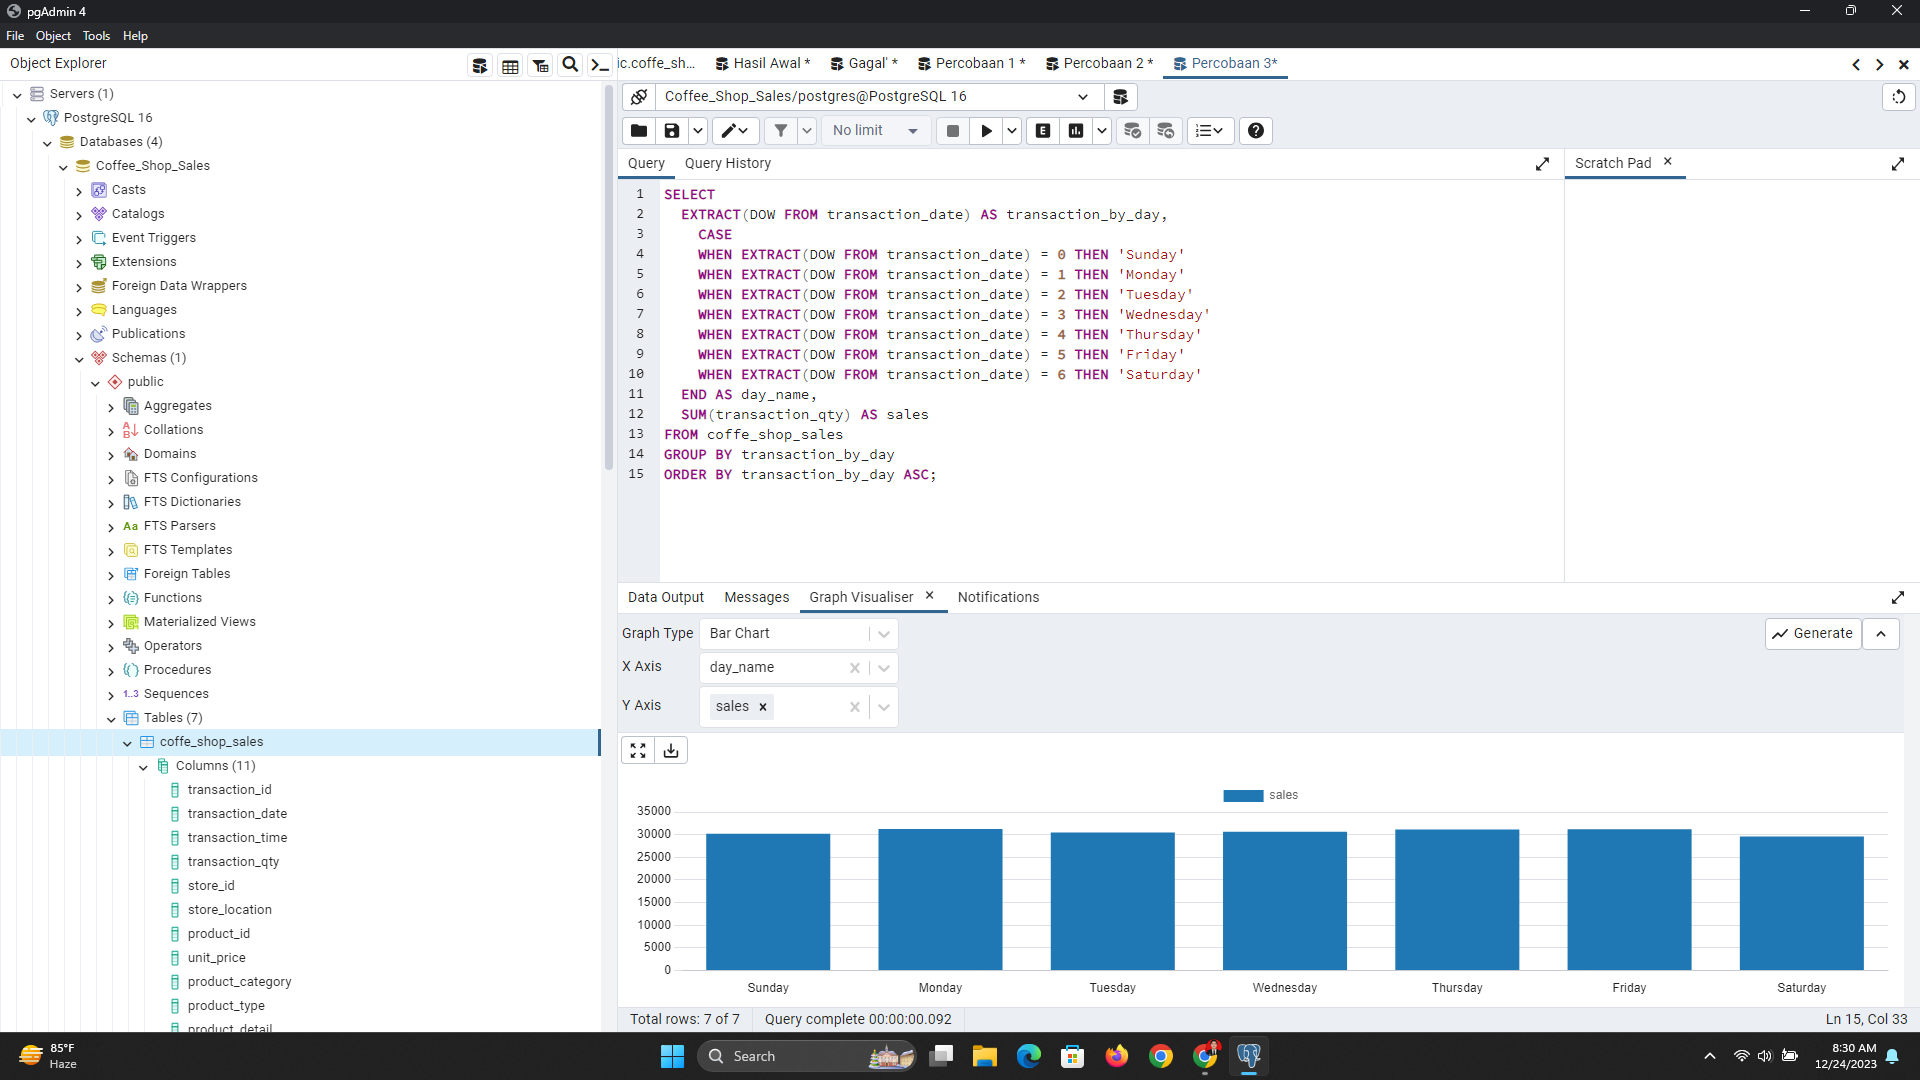

In [ ]:
Image('/content/drive/MyDrive/Screenshot (2643).png', width=1200, height=600)

***Dalam seminggu kesibukan cenderung sama namun pada hari sabtu dan minggu lebih sedikit, sehingga dapat disimpulkan hari yang paling sibuk yaitu pada hari kerja***

## 3.Produk mana yang paling banyak dijual dan paling jarang? Manakah yang mendorong pendapatan terbesar untuk bisnis?

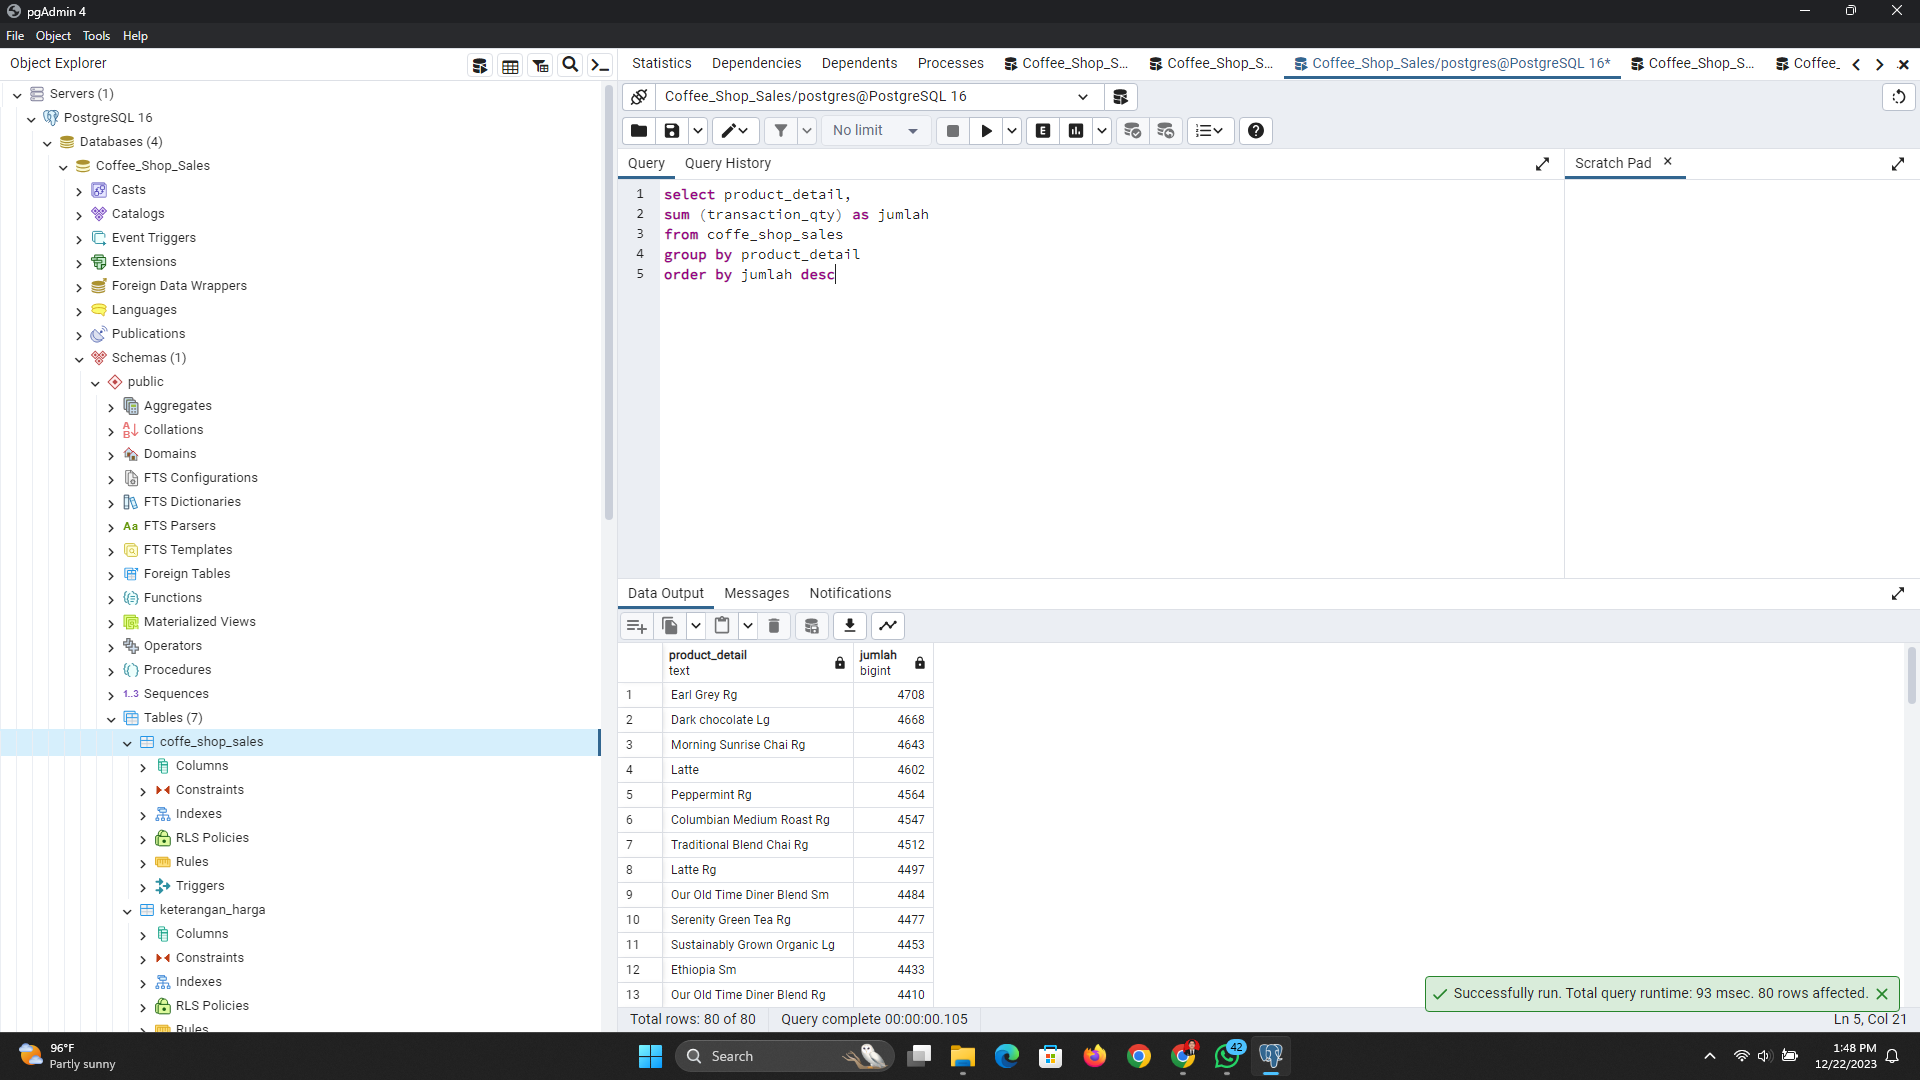

In [ ]:
Image('/content/drive/MyDrive/Screenshot (2624).png', width=1200, height=600)

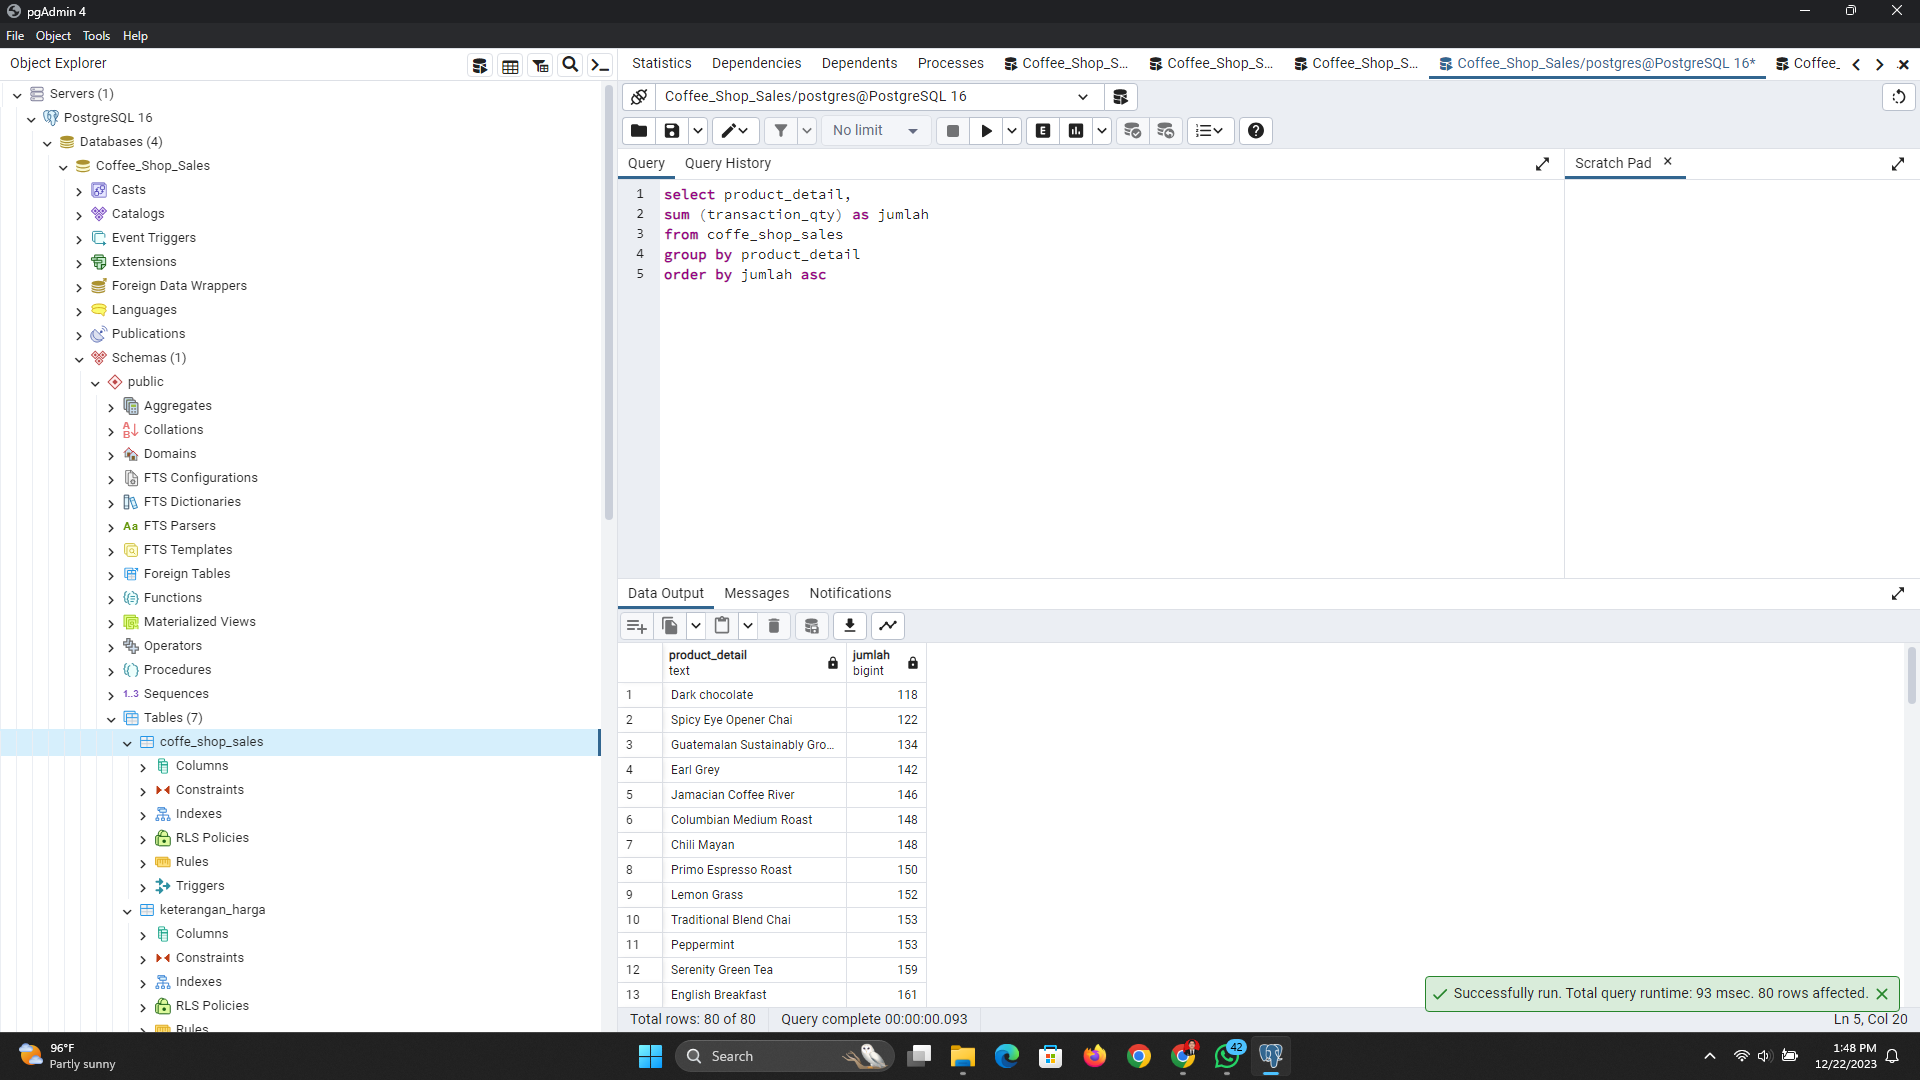

In [ ]:
Image('/content/drive/MyDrive/Screenshot (2625).png', width=1200, height=600)

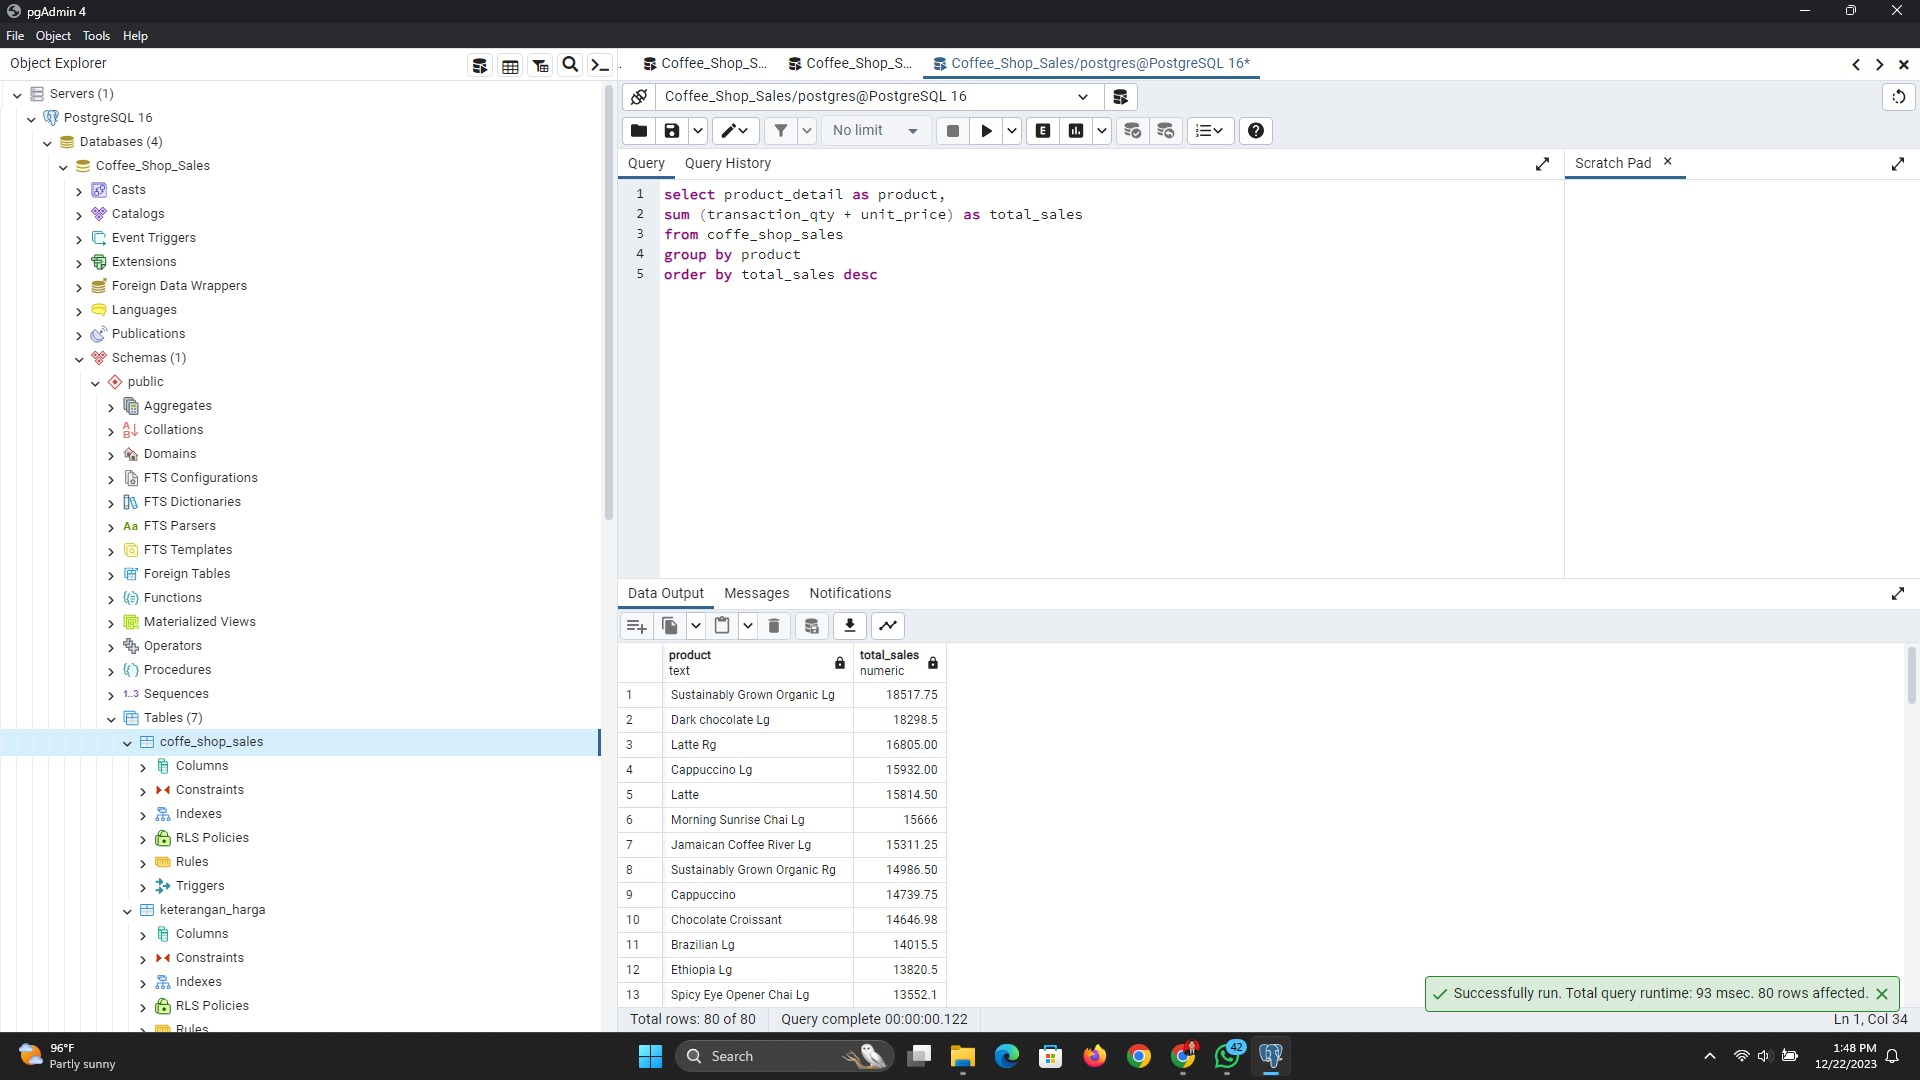

In [ ]:
Image('/content/drive/MyDrive/Screenshot (2626).png', width=1200, height=600)

***produk yang paling banyak terjual yaitu earl grey eg dan yang paling sedikit terjual yaitu dark chocolate, lalu untuk pendapatan terbesar diperoleh dari penjualan Sustainably Grown Organic Lg***

# End to End Analysis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay

In [ ]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


## Produk apa yang paling banyak di beli ?

In [ ]:
# Mengelompokan kolom yang ingin ditampilkan
df_1 = df[['product_category', 'transaction_qty']]
df_1.head()

,product_category,transaction_qty
0,Coffee,2
1,Tea,2
2,Drinking Chocolate,2
3,Coffee,1
4,Tea,2


In [ ]:
# Menjumlahkan transaksi berdasarkan kategori produk
data1 = pd.DataFrame(\
                     #Mengelompokan data dengan valid=1
                     df_1.groupby(by=["product_category"])["transaction_qty"]\
                     #Pengelompokan berdasarkan penjumlahan
                     .sum()\
                     #Mengurutkan data
                     .sort_values(ascending=False)\
                     #Mengambil TOP 5 Produk
                     .head(10)\
                     #Mereset nama header
                     .reset_index(name='transaction'))
data1

,product_category,transaction
0,Coffee,89250
1,Tea,69737
2,Bakery,23214
3,Drinking Chocolate,17457
4,Flavours,10511
5,Coffee beans,1828
6,Loose Tea,1210
7,Branded,776
8,Packaged Chocolate,487


<ipython-input-28-cdf954309431>:2: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  data1.plot(x='product_category',


<Axes: title={'center': 'Transaction Of Product Category'}, xlabel='Product Category', ylabel='Transaction'>

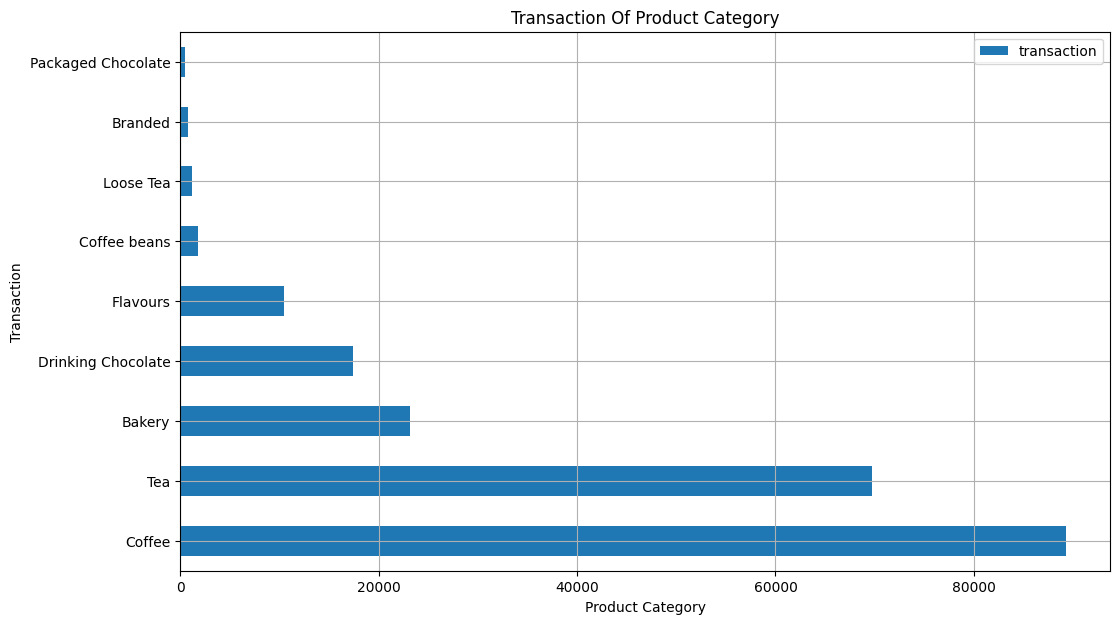

In [ ]:
# Visualisasi Bar Chart
data1.plot(x='product_category',
           y=['transaction'],
           kind='barh',
           grid = True,
           xlabel = 'Product Category',
           ylabel = 'Transaction',
           figsize=(12,7),
           rot = 0,
           title = 'Transaction Of Product Category',
           table = False,
           sort_columns = False,
           secondary_y = False)

Berdasarkan tabel dan chart diatas dapat diketahui bahwa produk **kopi** menjadi produk terlaris dengan total jumlah penjualan sebanyak 89250 pcs

## Tipe produk minuman kopi terlaris

In [ ]:
# Mencari value pada kolom berdasarkan parameter dari value kolom lain
df[df["product_category"] == "Coffee"]["product_type"].unique()

array(['Gourmet brewed coffee', 'Drip coffee', 'Barista Espresso',
       'Organic brewed coffee', 'Premium brewed coffee'], dtype=object)

Pada produk **Coffee** terbagi kedalam beberapa tipe yaitu

*   Gourmet brewed coffee
*   Drip coffee
*   Barista Espresso
*   Organic brewed coffee
*   Premium brewed coffee

In [ ]:
# Mengelompokan kolom yang ingin ditampilkan
df_2 = df[['product_category', 'product_type', 'transaction_qty']]
df_2.head()

,product_category,product_type,transaction_qty
0,Coffee,Gourmet brewed coffee,2
1,Tea,Brewed Chai tea,2
2,Drinking Chocolate,Hot chocolate,2
3,Coffee,Drip coffee,1
4,Tea,Brewed Chai tea,2


In [ ]:
# Mengelompokan kolom yang ingin ditampilkan dengan segmentasi
df_2_new = df_2[(df_2["product_category"] == "Coffee")]
df_2_new.head()

,product_category,product_type,transaction_qty
0,Coffee,Gourmet brewed coffee,2
3,Coffee,Drip coffee,1
6,Coffee,Drip coffee,1
7,Coffee,Gourmet brewed coffee,2
8,Coffee,Barista Espresso,1


In [ ]:
# Menjumlahkan transaksi berdasarkan tipe produk
data2 = pd.DataFrame(\
                     #Mengelompokan data dengan valid=1
                     df_2_new.groupby(by=["product_type"])["transaction_qty"]\
                     #Pengelompokan berdasarkan penjumlahan
                     .sum()\
                     #Mengurutkan data
                     .sort_values(ascending=False)\
                     #Mengambil TOP 5 Produk
                     .head(10)\
                     #Mereset nama header
                     .reset_index(name='transaction_type'))
data2

,product_type,transaction_type
0,Gourmet brewed coffee,25973
1,Barista Espresso,24943
2,Organic brewed coffee,13012
3,Drip coffee,12891
4,Premium brewed coffee,12431


<ipython-input-33-ee1ea381c1cb>:2: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  data2.plot(x='product_type',


<Axes: title={'center': 'Type Product'}, xlabel='Product Type', ylabel='Transaction'>

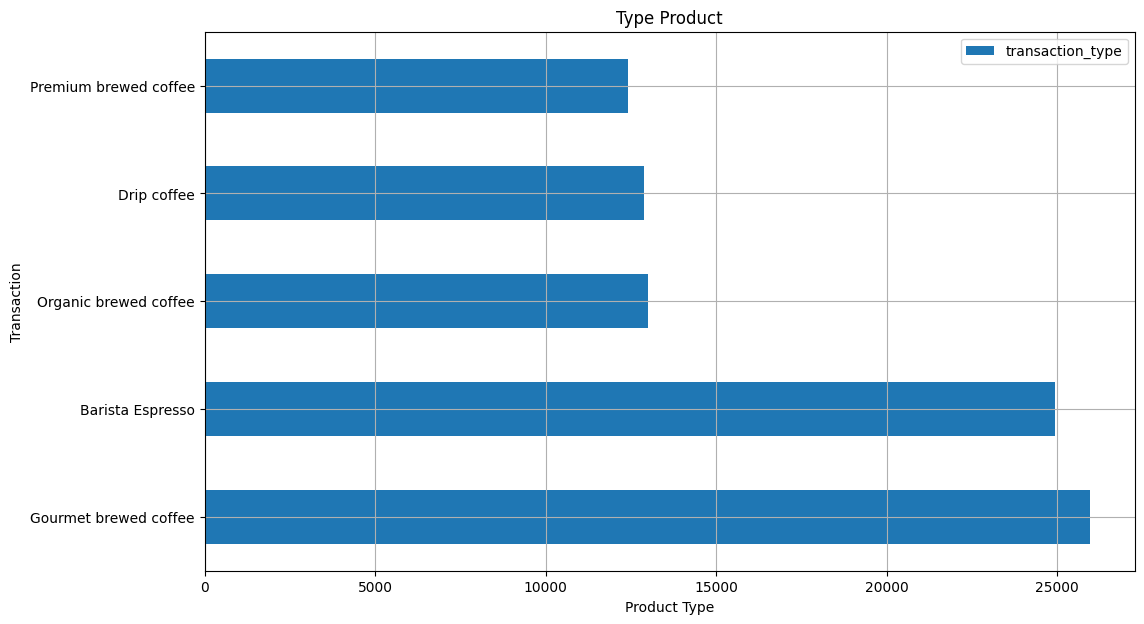

In [ ]:
# Visualisasi Bar Chart
data2.plot(x='product_type',
           y=['transaction_type'],
           kind='barh',
           grid = True,
           xlabel = 'Product Type',
           ylabel = 'Transaction',
           figsize=(12,7),
           rot = 0,
           title = 'Type Product',
           table = False,
           sort_columns = False,
           secondary_y = False)

Berdasarkan tabel dan chart diatas dapat diketahui bahwa tipe produk dari kopi yaitu **Gourmet brewed coffee** menjadi tipe produk terlaris dengan total jumlah penjualan sebanyak 25973 pcs

## Detail produk terlaris berdasarkan tipe produk **Gourmet brewed coffee**

In [ ]:
# Mencari value pada kolom berdasarkan parameter dari value kolom lain
df[df["product_type"] == "Gourmet brewed coffee"]["product_detail"].unique()

array(['Ethiopia Rg', 'Columbian Medium Roast Sm', 'Ethiopia Lg',
       'Columbian Medium Roast Rg', 'Ethiopia Sm',
       'Columbian Medium Roast Lg'], dtype=object)

Pada tipe produk **Gourmet brewed coffee** terbagi kedalam beberapa detail produk yaitu

*   Ethiopia Rg
*   Columbian Medium Roast Sm
*   Ethiopia Lg
*   Columbian Medium Roast Rg
*   Ethiopia Sm
*   Columbian Medium Roast Lg

In [ ]:
# Mengelompokan kolom yang ingin ditampilkan
df_3 = df[['product_type', 'product_detail', 'transaction_qty']]
df_3.head()

,product_type,product_detail,transaction_qty
0,Gourmet brewed coffee,Ethiopia Rg,2
1,Brewed Chai tea,Spicy Eye Opener Chai Lg,2
2,Hot chocolate,Dark chocolate Lg,2
3,Drip coffee,Our Old Time Diner Blend Sm,1
4,Brewed Chai tea,Spicy Eye Opener Chai Lg,2


In [ ]:
# Mengelompokan kolom yang ingin ditampilkan menggunakan segmentasi
df_3_new = df_3[(df_3["product_type"] == "Gourmet brewed coffee")]
df_3_new.head()

,product_type,product_detail,transaction_qty
0,Gourmet brewed coffee,Ethiopia Rg,2
7,Gourmet brewed coffee,Columbian Medium Roast Sm,2
11,Gourmet brewed coffee,Ethiopia Lg,2
20,Gourmet brewed coffee,Ethiopia Lg,2
33,Gourmet brewed coffee,Columbian Medium Roast Rg,2


In [ ]:
# Menjumlahkan transaksi berdasarkan detail produk
data3 = pd.DataFrame(\
                     #Mengelompokan data dengan valid=1
                     df_3_new.groupby(by=["product_detail"])["transaction_qty"]\
                     #Pengelompokan berdasarkan penjumlahan
                     .sum()\
                     #Mengurutkan data
                     .sort_values(ascending=False)\
                     #Mengambil TOP 5 Produk
                     .head(10)\
                     #Mereset nama header
                     .reset_index(name='transaction_detail'))
data3

,product_detail,transaction_detail
0,Columbian Medium Roast Rg,4547
1,Ethiopia Sm,4433
2,Ethiopia Rg,4393
3,Ethiopia Lg,4227
4,Columbian Medium Roast Lg,4195
5,Columbian Medium Roast Sm,4178


<ipython-input-38-2a4c9a1db941>:2: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  data3.plot(x='product_detail',


<Axes: title={'center': 'Detail Product'}, xlabel='Product Detail', ylabel='Transaction'>

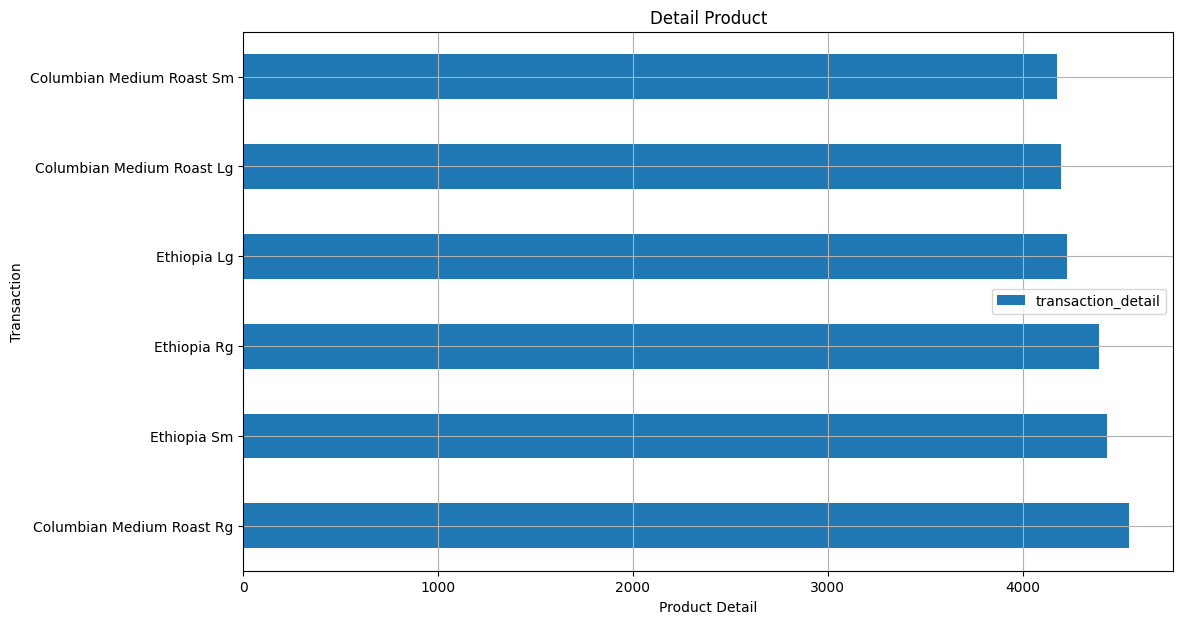

In [ ]:
# Visualisasi Bar Chart
data3.plot(x='product_detail',
           y=['transaction_detail'],
           kind='barh',
           grid = True,
           xlabel = 'Product Detail',
           ylabel = 'Transaction',
           figsize=(12,7),
           rot = 0,
           title = 'Detail Product',
           table = False,
           sort_columns = False,
           secondary_y = False)

Berdasarkan tabel dan chart diatas dapat diketahui bahwa detail produk dari Gourmet brewed coffee yaitu **Columbian Medium Roast Rg** menjadi detail produk terlaris dengan total jumlah penjualan sebanyak 4547 pcs

## Harga Produk

In [ ]:
df_4 = df[['product_type','product_detail', 'unit_price']]
df_4.head()

,product_type,product_detail,unit_price
0,Gourmet brewed coffee,Ethiopia Rg,3.0
1,Brewed Chai tea,Spicy Eye Opener Chai Lg,3.1
2,Hot chocolate,Dark chocolate Lg,4.5
3,Drip coffee,Our Old Time Diner Blend Sm,2.0
4,Brewed Chai tea,Spicy Eye Opener Chai Lg,3.1


In [ ]:
df_4.duplicated().sum()

149018

In [ ]:
df_4_new = df_4.drop_duplicates()
df_4_new.sort_values(by='unit_price', ascending=True)

,product_type,product_detail,unit_price
3352,Regular syrup,Chocolate syrup,0.8
3318,Sugar free syrup,Sugar Free Vanilla syrup,0.8
3291,Regular syrup,Carmel syrup,0.8
3254,Regular syrup,Hazelnut syrup,0.8
3,Drip coffee,Our Old Time Diner Blend Sm,2.0
...,...,...,...
11668,Housewares,I Need My Bean! Diner mug,23.0
16516,Organic Beans,Organic Decaf Blend,23.0
3296,Organic Beans,Organic Decaf Blend,28.0
4598,Clothing,I Need My Bean! T-shirt,28.0


In [ ]:
# Mengelompokan kolom yang ingin ditampilkan menggunakan segmentasi
df_4_menu = df_4_new[(df_4_new["product_type"] == "Gourmet brewed coffee")]
df_4_menu.sort_values(by='unit_price', ascending=True)

,product_type,product_detail,unit_price
7,Gourmet brewed coffee,Columbian Medium Roast Sm,2.0
122,Gourmet brewed coffee,Ethiopia Sm,2.2
33,Gourmet brewed coffee,Columbian Medium Roast Rg,2.5
0,Gourmet brewed coffee,Ethiopia Rg,3.0
143,Gourmet brewed coffee,Columbian Medium Roast Lg,3.0
11,Gourmet brewed coffee,Ethiopia Lg,3.5


erdasarkan analisis yang telah dilakukan, dapat diketahui bahwa

* kategori produk **Kopi** menjadi yang paling banyak dipesan sebanyak 89250 pcs
* tipe produk dari kopi yang paling banyak dipesan adalah **Gourmet Brewed Coffee** sejumlah 25973 pcs
* detail produk dari Gourmet brewed coffee yang sering dipesan adalah **Columbian Medium Roast Rg** sebanyak 4547 pcs

Jadi, produk tipe **Gourmet Brewed Coffee** dengan detail **Columbian Medium Roast Rg** menjadi produk yang paling sering dipesan dalam kategori produk kopi.

Serta dari segi harga, produk tipe **Gourmet Brewed Coffee** dengan detail **Columbian Medium Roast Rg** memiliki harga 2.5 Dollar dan tergolong lebih murah serta berada pada posisi harga termurah ketiga dari semua detail produk untuk tipe produk Gourmet Brewed Coffee

# Machine Learning

In [ ]:
# Mengimpor library
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Mengimpor file Excel
df = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/Data/Coffee Shop Sales.xlsx')

# Membuat variabel dependen (y) dan independen (x)
y = df['transaction_qty']
x = df[['product_category', 'product_type', 'unit_price']]

# Mengubah data kategorikal menjadi numerik dengan menggunakan metode one-hot encoding
x = pd.get_dummies(x, drop_first=True)

# Memisahkan data menjadi data latih dan data uji dengan proporsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Membuat objek regresi linier
reg = LinearRegression()

# Melatih algoritma regresi linier dengan menggunakan data latih
reg.fit(x_train, y_train)

# Membuat prediksi penjualan kopi dengan menggunakan data uji
y_pred = reg.predict(x_test)

# Mengukur kinerja algoritma regresi linier dengan menggunakan beberapa metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan metrik evaluasi
print('Mean Squared Error:', mse)
print('R-squared:', r2)
print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)


Mean Squared Error: 0.2512867295272364
R-squared: 0.13542136297919005
Coefficients: [ 0.00949951 -0.19089102  0.36245361 -0.22781458  0.17978543  0.29540336
 -0.16833036 -0.13881716  0.30753239 -0.14205164 -0.0396104   0.08418054
  0.06971604  0.07149285  0.08214295 -0.04664929 -0.19720579 -0.08251791
  0.01878485 -0.0609688  -0.07242975  0.02274685  0.00989934 -0.04246026
 -0.0396104   0.17978543 -0.06609674  0.00631478 -0.07572443 -0.05629926
  0.02077202 -0.14948385  0.03750579  0.01610025  0.10668559 -0.12778618
  0.18871777]
Intercept: 1.122920142260478


In [ ]:
!pip install dash


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 29.6 MB/s eta 0:00:00


In [ ]:
# Mengimpor library
import sys
import pandas as pd
import numpy as np
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Membuat objek aplikasi Dash
app = dash.Dash(__name__)

# Mengimpor file Excel
df = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/Data/Coffee Shop Sales.xlsx')

# Membuat variabel dependen (y) dan independen (x)
y = df['transaction_qty']
x = df[['product_category', 'product_type', 'unit_price']]

# Mengubah data kategorikal menjadi numerik dengan menggunakan metode one-hot encoding
x = pd.get_dummies(x, drop_first=True)

# Memisahkan data menjadi data latih dan data uji dengan proporsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Membuat objek regresi linier
reg = LinearRegression()

# Melatih algoritma regresi linier dengan menggunakan data latih
reg.fit(x_train, y_train)

# Membuat prediksi penjualan kopi dengan menggunakan data uji
y_pred = reg.predict(x_test)

# Mengukur kinerja algoritma regresi linier dengan menggunakan metrik mean squared error (MSE)
mse = np.mean((y_test - y_pred)**2)

# Menampilkan koefisien dan konstanta algoritma regresi linier
coef = reg.coef_
intercept = reg.intercept_

# Membuat grafik scatter plot antara nilai sebenarnya dan nilai prediksi
fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'Nilai Sebenarnya', 'y': 'Nilai Prediksi'})

# Membuat fungsi untuk menghitung prediksi penjualan kopi berdasarkan data baru
def calculate_prediction(unit_price, product_category, product_type):
  # Membuat data baru berdasarkan nilai-nilai yang dipilih dari widget
  new_data = pd.DataFrame({'unit_price': [unit_price], 'product_category': [product_category]})
  new_data = pd.get_dummies(new_data, drop_first=True)

  # Menambahkan kolom-kolom yang tidak ada dalam data baru dengan nilai 0
  for col in x.columns:
    if col not in new_data.columns:
      new_data[col] = 0

  # Mengurutkan kolom-kolom data baru sesuai dengan kolom-kolom data asli
  new_data = new_data[x.columns]

  # Membuat prediksi penjualan kopi berdasarkan data baru
  new_pred = reg.predict(new_data)

  # Mengembalikan hasil prediksi penjualan kopi
  return new_pred[0]

# Membuat layout aplikasi web
app.layout = html.Div([
  html.H1('Aplikasi Web Analisis Penjualan Kopi'),
  html.H2('Data Penjualan Kopi'),
  dcc.Graph(figure=px.imshow(df, color_continuous_scale='gray', labels={'color': 'Nilai'}, title='Data Penjualan Kopi')),
  html.H2('Kinerja Algoritma Regresi Linier'),
  html.P('Mean Squared Error: {}'.format(mse)),
  html.P('Coefficients: {}'.format(coef)),
  html.P('Intercept: {}'.format(intercept)),
  html.H2('Grafik Scatter Plot'),
  dcc.Graph(figure=fig),
  html.H2('Widget Slider'),
  dcc.Slider(id='unit_price', min=0, max=10, value=5, marks={i: str(i) for i in range(11)}),
  html.H2('Widget Selectbox'),
  dcc.Dropdown(id='product_category', options=[{'label': i, 'value': i} for i in ['Coffee', 'Tea', 'Juice', 'Soda', 'Pastry']], value='Coffee'),
  html.H2('Widget Multiselect'),
  dcc.Checklist(id='product_type', options=[{'label': i, 'value': i} for i in ['Gourmet brewed coffee', 'Espresso', 'Latte', 'Cappuccino', 'Mocha', 'Americano', 'Macchiato', 'Black tea', 'Green tea', 'Herbal tea', 'Fruit juice', 'Vegetable juice', 'Smoothie', 'Cola', 'Lemonade', 'Croissant', 'Muffin', 'Donut', 'Cookie', 'Brownie']], value=['Gourmet brewed coffee']),
  html.H2('Hasil Prediksi Penjualan Kopi'),
  html.Div(id='output')
])

# Membuat fungsi callback untuk mengupdate output berdasarkan input
@app.callback(
  Output('output', 'children'),
  Input('unit_price', 'value'),
  Input('product_category', 'value'),
  Input('product_type', 'value')
)
def update_output(unit_price, product_category, product_type):
  # Menghitung prediksi penjualan kopi berdasarkan data baru
  prediction = calculate_prediction(unit_price, product_category, product_type)

  # Menampilkan hasil prediksi penjualan kopi pada aplikasi web
  return 'Berdasarkan nilai-nilai yang Anda pilih, prediksi penjualan kopi adalah: {}'.format(prediction)

# Menjalankan aplikasi web
if __name__ == '__main__':
  app.run_server(debug=True)


<ipython-input-5-9bb0fc3d3aaf>:7: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-5-9bb0fc3d3aaf>:8: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


<IPython.core.display.Javascript object>

# MODIFYING CODE VERSION

In [ ]:
# Mengimpor library Pandas
import pandas as pd

# Membuat DataFrame Pandas dari data hasil modelling
df = pd.DataFrame(data={'unit_price': x_test['unit_price'], 'y_test': y_test, 'y_pred': y_pred})

# Menyimpan DataFrame Pandas ke file csv
df.to_csv('/content/drive/MyDrive/Colab_Notebooks/SQL Data/hasil_modelling (1).csv', index=False)

In [ ]:
# Mengakses Looker Studio
lookerstudio.google.com

# Membuat laporan baru
Pilih Blank Report

# Mengupload file csv
Pilih File Upload
Pilih hasil_modelling.csv
Pilih Add

# Memilih tema
Pilih Constellation

# Membuat diagram
Pilih Add a Chart
Pilih Scatter Plot
Pilih unit_price sebagai x-axis
Pilih y_test dan y_pred sebagai y-axis
Pilih Add to Report

# Membuat widget
Pilih Add a Widget
Pilih Slider
Pilih unit_price sebagai value
Pilih Add to Report


SyntaxError: ignored

In [ ]:
!pip install Flask-Caching

In [ ]:
!pip install dash_defer_js_import

  Preparing metadata (setup.py) ... done
  Created wheel for dash_defer_js_import: filename=dash_defer_js_import-0.0.2-py3-none-any.whl size=38872 sha256=3e58f4e9c06eb51b50365a699b8d261ca1008636b7408fe5c0eff9514854682f
  Stored in directory: /root/.cache/pip/wheels/e2/93/65/2550e0c61cb8b95c7ff4fabff04c389780909f7fca71982bea
Successfully built dash_defer_js_import


In [ ]:
# Mengimpor library
import sys
import pandas as pd
import numpy as np
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Mengimpor library untuk caching
import dash_table
import flask
import os
from flask_caching import Cache
# Mengimpor library untuk precomputing
import time
# Mengimpor library untuk lazy loading
import dash_defer_js_import

# Membuat objek aplikasi Dash
app = dash.Dash(__name__)

# Mengatur cache untuk aplikasi Dash
cache = Cache(app.server, config={
    'CACHE_TYPE': 'filesystem',
    'CACHE_DIR': 'cache-directory'
})

# Membuat fungsi untuk mengimpor file Excel
@cache.memoize()
def load_data():
  # Mengimpor file Excel
  df = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/Data/Coffee Shop Sales.xlsx')
  return df

# Membuat fungsi untuk membuat variabel dependen (y) dan independen (x)
@cache.memoize()
def create_variables():
  # Memanggil fungsi load_data
  df = load_data()
  # Membuat variabel dependen (y) dan independen (x)
  y = df['transaction_qty']
  x = df[['product_category', 'product_type', 'unit_price']]
  # Mengubah data kategorikal menjadi numerik dengan menggunakan metode one-hot encoding
  x = pd.get_dummies(x, drop_first=True)
  return x, y

# Membuat fungsi untuk memisahkan data menjadi data latih dan data uji
@cache.memoize()
def split_data():
  # Memanggil fungsi create_variables
  x, y = create_variables()
  # Memisahkan data menjadi data latih dan data uji dengan proporsi 80:20
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
  return x_train, x_test, y_train, y_test

# Membuat fungsi untuk membuat objek regresi linier
@cache.memoize()
def create_model():
  # Membuat objek regresi linier
  reg = LinearRegression()
  return reg

# Membuat fungsi untuk melatih algoritma regresi linier dengan menggunakan data latih
@cache.memoize()
def train_model():
  # Memanggil fungsi split_data
  x_train, x_test, y_train, y_test = split_data()
  # Memanggil fungsi create_model
  reg = create_model()
  # Melatih algoritma regresi linier dengan menggunakan data latih
  reg.fit(x_train, y_train)
  return reg

# Membuat fungsi untuk membuat prediksi penjualan kopi dengan menggunakan data uji
@cache.memoize()
def predict_sales():
  # Memanggil fungsi split_data
  x_train, x_test, y_train, y_test = split_data()
  # Memanggil fungsi train_model
  reg = train_model()
  # Membuat prediksi penjualan kopi dengan menggunakan data uji
  y_pred = reg.predict(x_test)
  return y_pred

# Membuat fungsi untuk mengukur kinerja algoritma regresi linier dengan menggunakan metrik mean squared error (MSE)
@cache.memoize()
def calculate_mse():
  # Memanggil fungsi split_data
  x_train, x_test, y_train, y_test = split_data()
  # Memanggil fungsi predict_sales
  y_pred = predict_sales()
  # Mengukur kinerja algoritma regresi linier dengan menggunakan metrik mean squared error (MSE)
  mse = np.mean((y_test - y_pred)**2)
  return mse

# Membuat fungsi untuk menampilkan koefisien dan konstanta algoritma regresi linier
@cache.memoize()
def show_parameters():
  # Memanggil fungsi train_model
  reg = train_model()
  # Menampilkan koefisien dan konstanta algoritma regresi linier
  coef = reg.coef_
  intercept = reg.intercept_
  return coef, intercept

# Membuat fungsi untuk membuat grafik scatter plot antara nilai sebenarnya dan nilai prediksi
@cache.memoize()
def create_plot():
  # Memanggil fungsi split_data
  x_train, x_test, y_train, y_test = split_data()
  # Memanggil fungsi predict_sales
  y_pred = predict_sales()
  # Membuat grafik scatter plot antara nilai sebenarnya dan nilai prediksi
  fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'Nilai Sebenarnya', 'y': 'Nilai Prediksi'})
  return fig

# Membuat fungsi untuk menghitung prediksi penjualan kopi berdasarkan data baru
@cache.memoize()
def calculate_prediction(unit_price, product_category, product_type):
  # Memanggil fungsi create_variables
  x, y = create_variables()
  # Memanggil fungsi train_model
  reg = train_model()
  # Membuat data baru berdasarkan nilai-nilai yang dipilih dari widget
  new_data = pd.DataFrame({'unit_price': [unit_price], 'product_category': [product_category]})
  new_data = pd.get_dummies(new_data, drop_first=True)
  # Menambahkan kolom-kolom yang tidak ada dalam data baru dengan nilai 0
  for col in x.columns:
    if col not in new_data.columns:
      new_data[col] = 0
  # Mengurutkan kolom-kolom data baru sesuai dengan kolom-kolom data asli
  new_data = new_data[x.columns]
  # Membuat prediksi penjualan kopi berdasarkan data baru
  new_pred = reg.predict(new_data)
  # Mengembalikan hasil prediksi penjualan kopi
  return new_pred[0]

# Membuat layout aplikasi web
app.layout = html.Div([
  html.H1('Aplikasi Web Analisis Penjualan Kopi'),
  html.H2('Data Penjualan Kopi'),
  # Menggunakan dash_table untuk menampilkan data
  dash_table.DataTable(
    id='table',
    columns=[{"name": i, "id": i} for i in load_data().columns],
    data=load_data().to_dict('records'),
    style_table={'overflowX': 'auto'}
  ),
  html.H2('Kinerja Algoritma Regresi Linier'),
  # Menampilkan nilai MSE, koefisien, dan konstanta
  html.P('Mean Squared Error: {}'.format(calculate_mse())),
  html.P('Coefficients: {}'.format(show_parameters()[0])),
  html.P('Intercept: {}'.format(show_parameters()[1])),
  html.H2('Grafik Scatter Plot'),
  # Menampilkan grafik scatter plot
  dcc.Graph(figure=create_plot()),
  html.H2('Widget Slider'),
  # Membuat widget slider untuk memilih harga satuan
  dcc.Slider(id='unit_price', min=0, max=10, value=5, marks={i: str(i) for i in range(11)}),
  html.H2('Widget Selectbox'),
  # Membuat widget selectbox untuk memilih kategori produk
  dcc.Dropdown(id='product_category', options=[{'label': i, 'value': i} for i in ['Coffee', 'Tea', 'Juice', 'Soda', 'Pastry']], value='Coffee'),
  html.H2('Widget Multiselect'),
  # Membuat widget multiselect untuk memilih jenis produk
  dcc.Checklist(id='product_type', options=[{'label': i, 'value': i} for i in ['Gourmet brewed coffee', 'Espresso', 'Latte', 'Cappuccino', 'Mocha', 'Americano', 'Macchiato', 'Black tea', 'Green tea', 'Herbal tea', 'Fruit juice', 'Vegetable juice', 'Smoothie', 'Cola', 'Lemonade', 'Croissant', 'Muffin', 'Donut', 'Cookie', 'Brownie']], value=['Gourmet brewed coffee']),
  html.H2('Hasil Prediksi Penjualan Kopi'),
  # Menampilkan hasil prediksi penjualan kopi
  html.Div(id='output')
])

# Membuat fungsi callback untuk mengupdate output berdasarkan input
@app.callback(
  Output('output', 'children'),
  Input('unit_price', 'value'),
  Input('product_category', 'value'),
  Input('product_type', 'value')
)
def update_output(unit_price, product_category, product_type):
  # Menghitung prediksi penjualan kopi berdasarkan data baru
  prediction = calculate_prediction(unit_price, product_category, product_type)

  # Menampilkan hasil prediksi penjualan kopi pada aplikasi web
  return 'Berdasarkan nilai-nilai yang Anda pilih, prediksi penjualan kopi adalah: {}'.format(prediction)

# Menjalankan aplikasi web
if __name__ == '__main__':
  app.run_server(debug=True)

<ipython-input-10-f1ce91948700>:13: UserWarning:


The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`



<IPython.core.display.Javascript object>

In [ ]:
# Mengimpor library Pandas
import pandas as pd

# Membuat DataFrame Pandas dari data hasil modelling
df = pd.DataFrame(data={'unit_price': x_test['unit_price'], 'y_test': y_test, 'y_pred': y_pred})

# Menyimpan DataFrame Pandas ke file csv
df.to_csv('/content/drive/MyDrive/Colab_Notebooks/SQL Data/hasil_modelling (1).csv', index=False)

Link Dashboard Lookerstudio : [Dashboard Coffee Shop](https://lookerstudio.google.com/reporting/d34e289c-c454-4c63-9831-c3b8219fa30f)